# Portfolio Task 5

In [1]:
import pandas as pd
import numpy as np

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing the credit card data set using panda
creditcard = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

#returning the head of the data set
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#printing info for the dataset to check number of columns, rows etc
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
from collections import Counter

# summarize the class distribution
fraud = creditcard.values[:,-1]
counter = Counter(fraud)
for CLASS,count in counter.items():
	percentage = count / len(fraud) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (CLASS, count, percentage))

Class=0, Count=284315, Percentage=99.827%
Class=1, Count=492, Percentage=0.173%


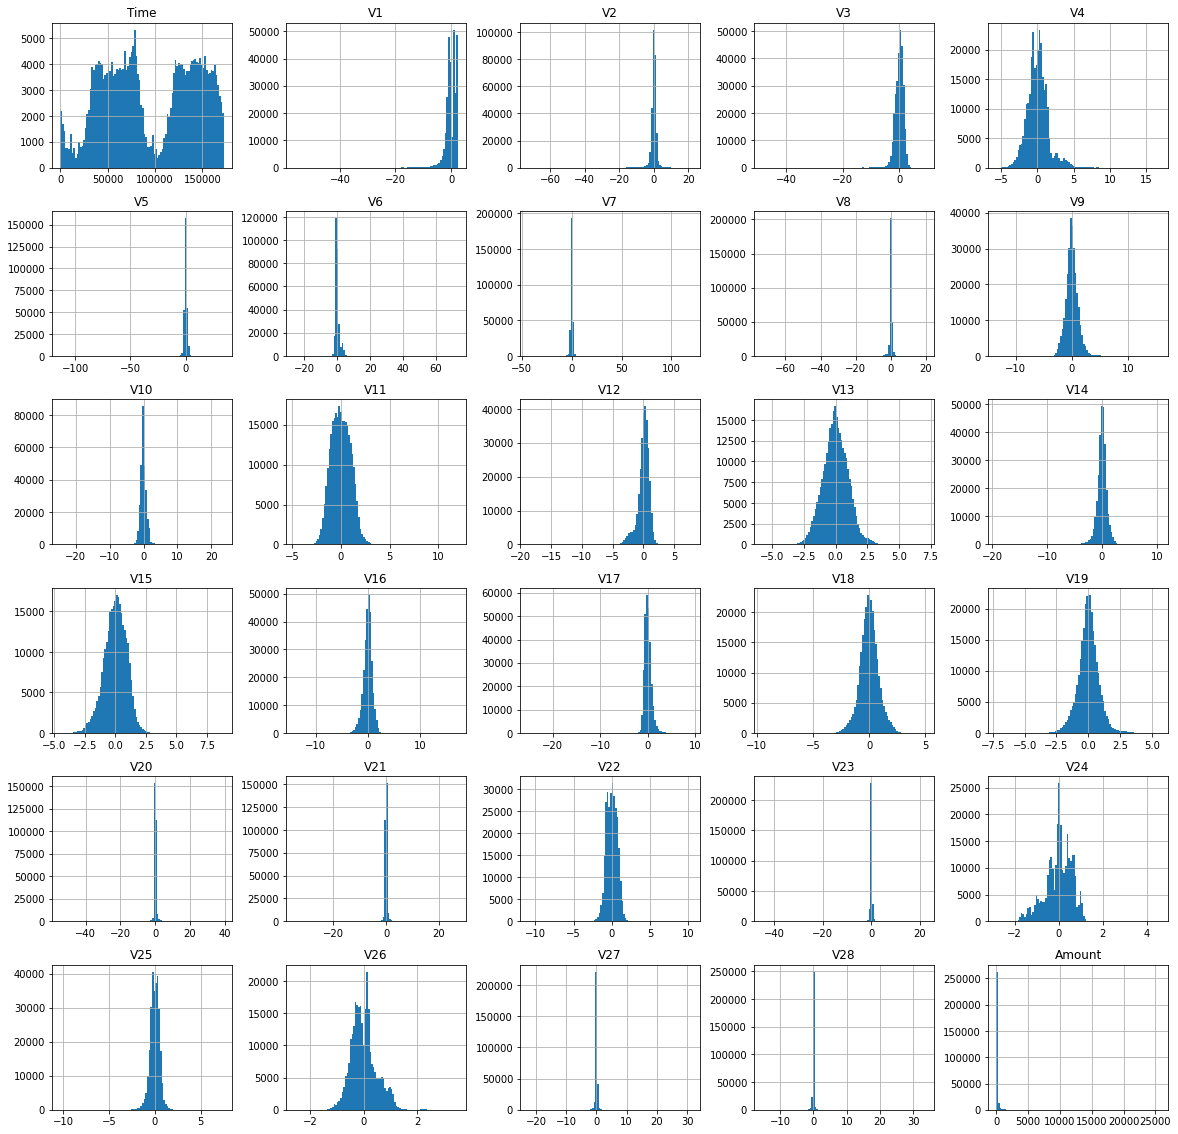

In [17]:
import matplotlib.pyplot as plt

# drop the class variable
df = creditcard.drop("Class", axis=1)
# create a histogram plot of each numeric variable
ax = df.hist(bins=100)

# set the size of the plots
plt.rcParams['figure.figsize'] = (20.0, 20.0)


In [7]:
#Checking how many columns have null values
df.isnull().any().sum()

0

In [8]:
#Checking for any duplicate data
duplicate_data = df[df.duplicated(keep=False)]
duplicate_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,-1.440241,-0.511918,0.607878,-0.627645,1.023032,-0.888334,0.413444,1.860351,1.316597,1.094512,-0.791037,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74


In [9]:
#here we can see the number of unique calues in each column
print(creditcard.nunique())

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [10]:
#Assigning Y to the class column and X to the rest of the data
X = df
Y = creditcard["Class"]

In [11]:
from sklearn.preprocessing import StandardScaler

#Using StandardScaler to scale the data
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [12]:
#Viewing the the described info about the scaled data
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.050379e-14,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,2.026926e-17,1.622758e-15,2.052953e-15,-8.310622e-17,-8.845502e-16,-1.789241e-15,-1.542079e-16,8.046919e-16,-2.547965e-16,-4.550555e-16,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,-4.700128e+00,-1.869868e+01,-5.819392e+00,-2.004428e+01,-4.915191e+00,-1.612534e+01,-2.962645e+01,-1.133266e+01,-8.861402e+00,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,-7.470224e-01,-4.058964e-01,-6.516198e-01,-4.439565e-01,-6.368132e-01,-5.341353e-01,-5.695609e-01,-5.951621e-01,-5.605369e-01,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,-3.209268e-02,1.401448e-01,-1.363250e-02,5.278702e-02,5.251917e-02,7.579255e-02,-7.732604e-02,-4.338370e-03,4.588014e-03,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,7.245863e-01,6.187332e-01,6.656518e-01,5.144513e-01,7.088502e-01,5.971989e-01,4.705737e-01,5.974968e-01,5.637928e-01,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,1.177504e+01,7.854679e+00,7.160735e+00,1.098147e+01,9.699117e+00,1.976044e+01,1.089502e+01,6.014342e+00,6.869414e+00,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


Exploring the data set has revealed that there are not any null values or empty cells; therefore, this is not addressed during the preprocessing. Additionally, we can see that there are some duplicate data in our dataset. However, this could potentially help flag up fraudulent transactions, and it could be representative of transactions in the real world which is why I didn't remove the duplicated data. 

We have looked at the distribution of input variables through the plotting of histograms. From looking at the histograms, we can see that the distribution of most of the PCA components is Gaussian and a lot of them appear centred around zero as well. This suggests that the variables could have been standardised as part of transforming them through PCA.

### Classification models

In [13]:
from sklearn.model_selection import train_test_split

#Splitting X into 60% train data and 40% test data

X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0, train_size = 0.6)


In [14]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report

#Using cross validation with 10 folds 

from sklearn.model_selection import KFold, cross_val_predict
cross_val = KFold(n_splits = 10, random_state= 10, shuffle = False)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC

In [15]:
from sklearn.svm import SVC



#Training the SVC model on train data
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = cross_val_predict(svc, X_train, y_train, cv = cross_val)

#Returning the confusion matrix and classification report
cm_svc = pd.crosstab(y_pred_svc, y_train, rownames = ['pred'], colnames = ['true'], margins = True)
report_svc = classification_report(y_train, y_pred_svc, labels = [0, 1])
print(cm_svc, '\n\n', report_svc)


true       0    1     All
pred                     
0     170580  113  170693
1         11  180     191
All   170591  293  170884 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170591
           1       0.94      0.61      0.74       293

    accuracy                           1.00    170884
   macro avg       0.97      0.81      0.87    170884
weighted avg       1.00      1.00      1.00    170884



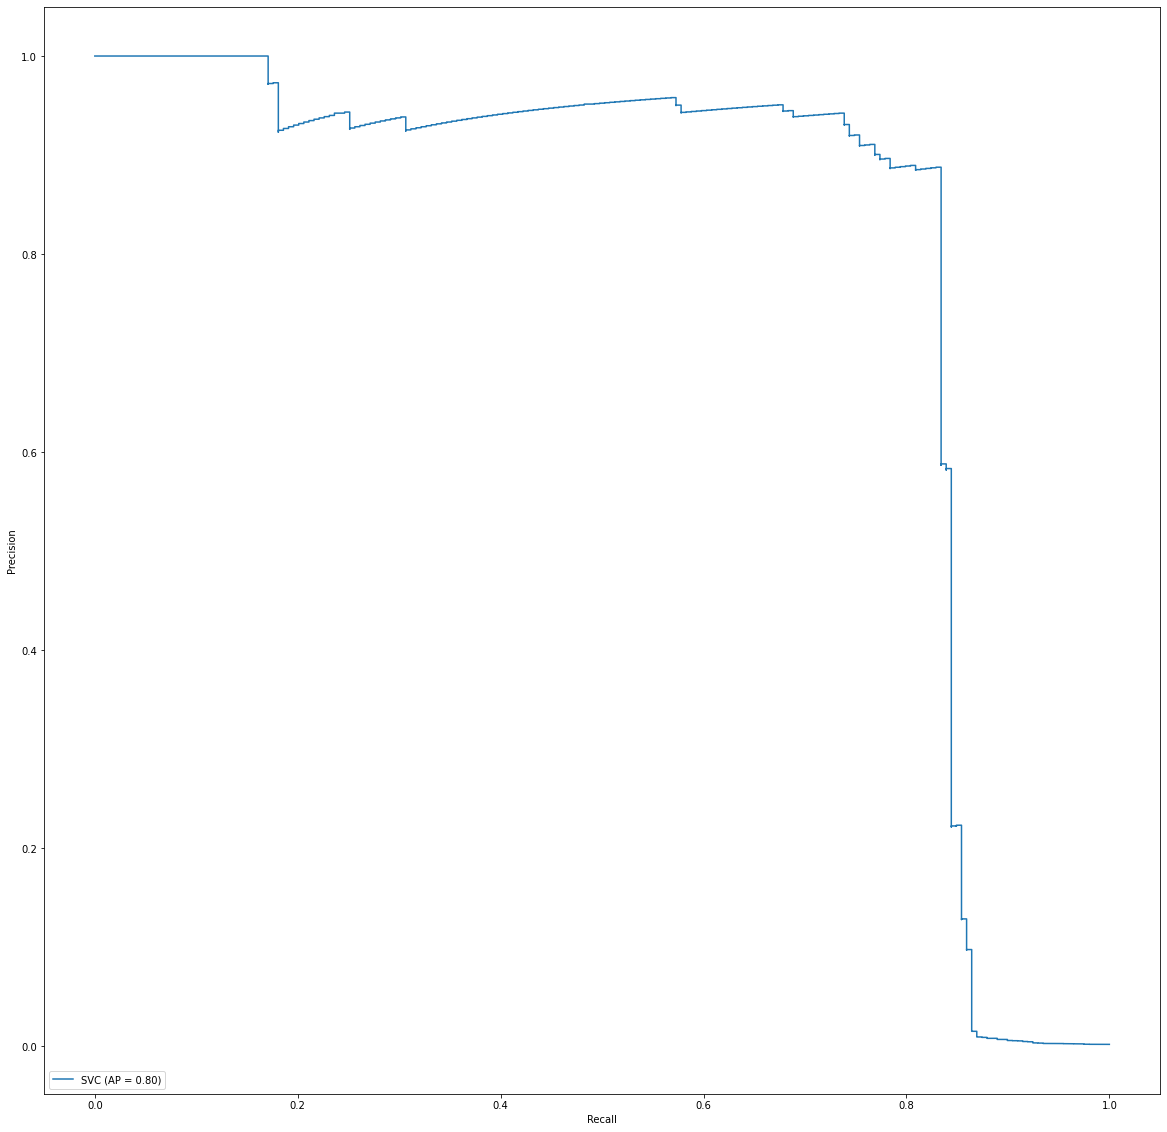

In [16]:

#Plotting the precision recall curve with the average precision
plot_precision_recall_curve(svc, X_test, y_test, name = 'SVC')

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Training the Logistic Regression model on train data
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = cross_val_predict(lr, X_train, y_train, cv = cross_val)

#Returning the confusion matrix and classification report
cm_lr = pd.crosstab(y_pred_lr, y_train, rownames = ['pred'], colnames = ['true'], margins = True)
report_lr = classification_report(y_train, y_pred_lr, labels = [0, 1])
print(cm_lr, '\n\n', report_lr)

true       0    1     All
pred                     
0     170564  112  170676
1         27  181     208
All   170591  293  170884 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170591
           1       0.87      0.62      0.72       293

    accuracy                           1.00    170884
   macro avg       0.93      0.81      0.86    170884
weighted avg       1.00      1.00      1.00    170884



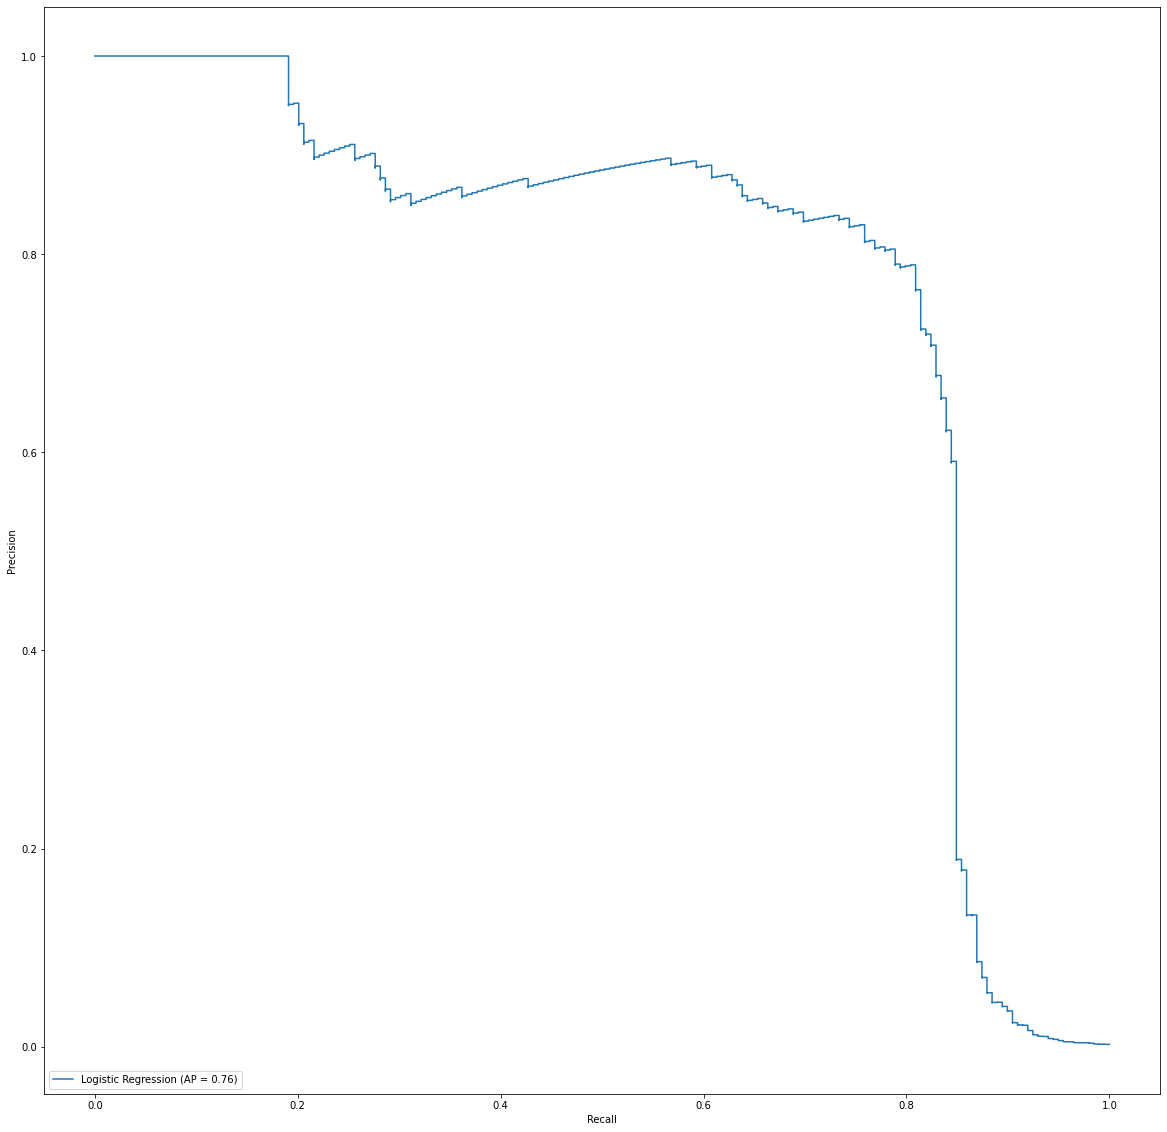

In [ ]:
#Plotting the precision recall curve with the average precision
plot_precision_recall_curve(lr, X_test, y_test, name = 'Logistic Regression')

In [ ]:

from sklearn.ensemble import RandomForestClassifier
#Training the Random Forest model on train data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = cross_val_predict(rfc, X_train, y_train, cv = cross_val)

#Returning the confusion matrix and classification report
cm_rfc = pd.crosstab(y_pred_rfc, y_train, rownames = ['pred'], colnames = ['true'], margins = True)
report_rfc = classification_report(y_train, y_pred_rfc, labels = [0, 1])
print(cm_rfc, '\n\n', report_rfc)

true       0    1     All
pred                     
0     170577   69  170646
1         14  224     238
All   170591  293  170884 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170591
           1       0.94      0.76      0.84       293

    accuracy                           1.00    170884
   macro avg       0.97      0.88      0.92    170884
weighted avg       1.00      1.00      1.00    170884



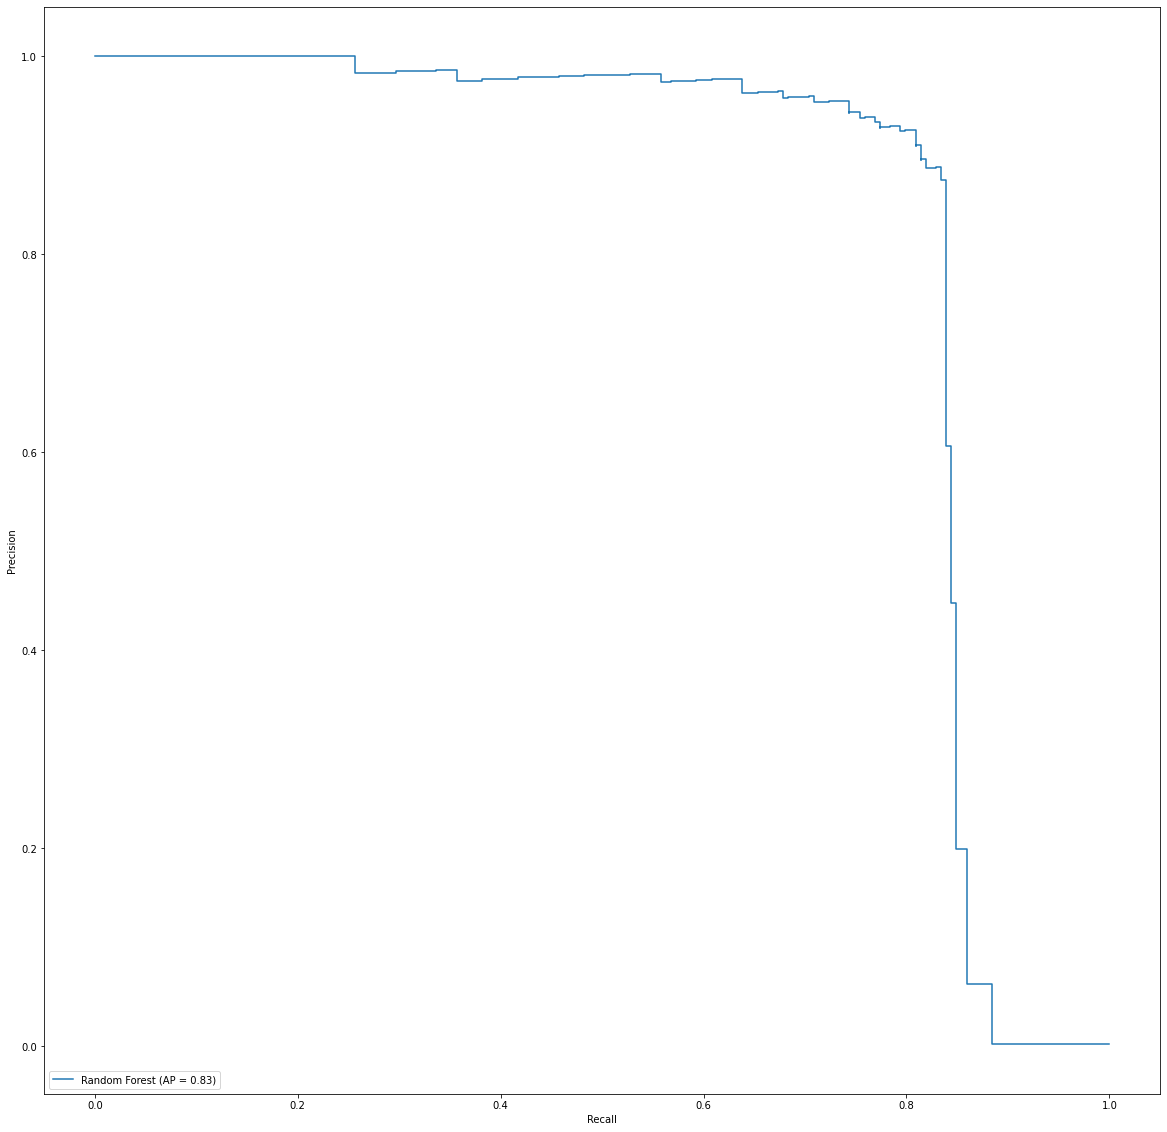

In [ ]:
#Plotting the precision recall curve with the average precision
plot_precision_recall_curve(rfc, X_test, y_test, name = 'Random Forest')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Training the Decision Tree Classifier model on train data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = cross_val_predict(dtc, X_train, y_train, cv = cross_val)

#Returning the confusion matrix and classification report
cm_dtc = pd.crosstab(y_pred_dtc, y_train, rownames = ['pred'], colnames = ['true'], margins = True)
report_dtc = classification_report(y_train, y_pred_dtc, labels = [0, 1])
print(cm_dtc, '\n\n', report_dtc)

true       0    1     All
pred                     
0     170515   80  170595
1         76  213     289
All   170591  293  170884 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170591
           1       0.74      0.73      0.73       293

    accuracy                           1.00    170884
   macro avg       0.87      0.86      0.87    170884
weighted avg       1.00      1.00      1.00    170884



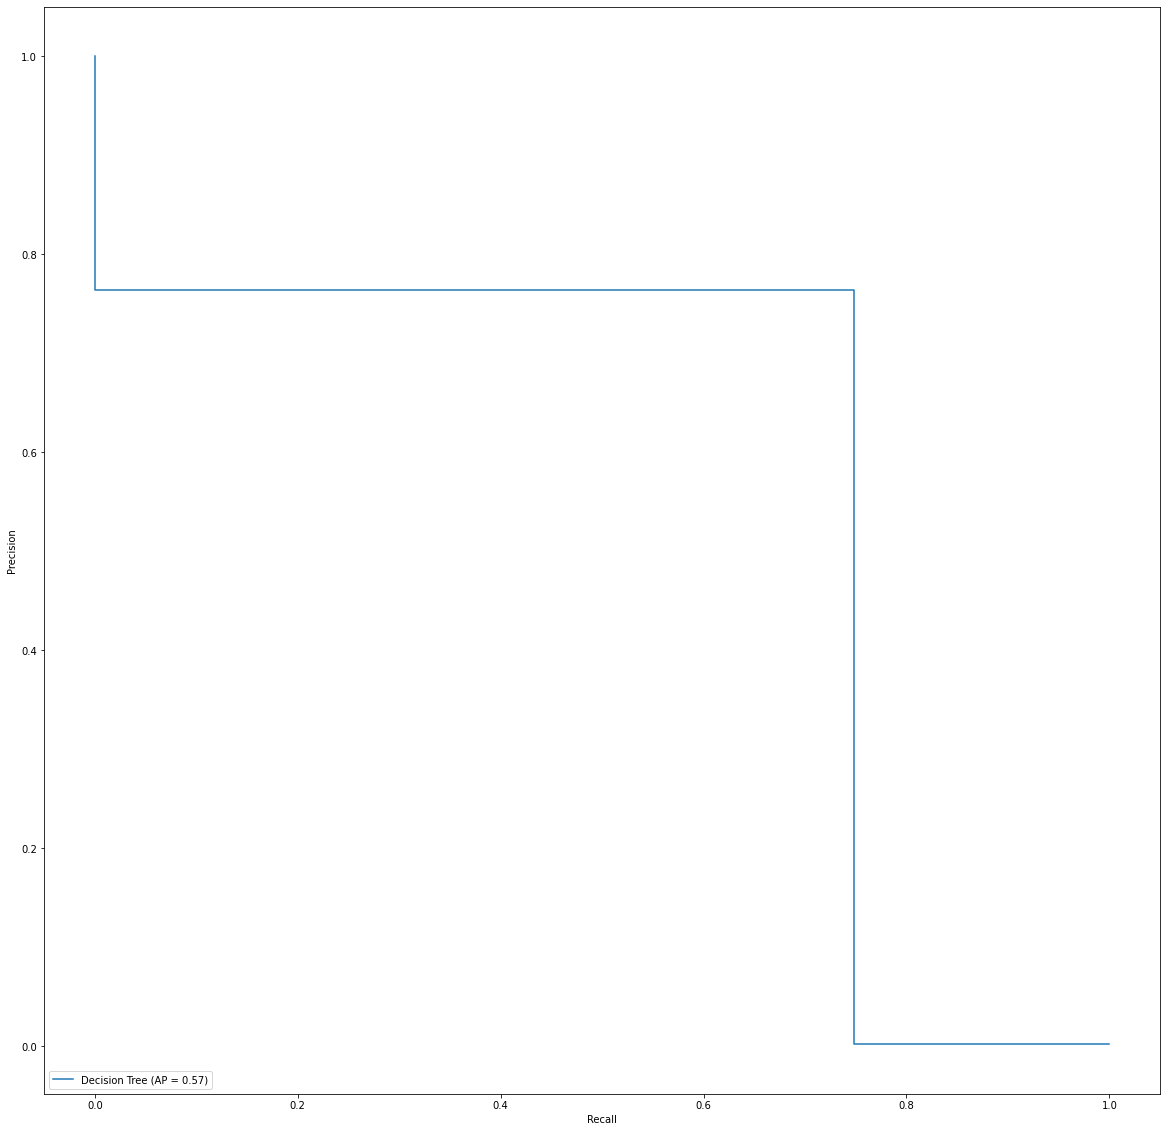

In [ ]:
#Plotting the precision recall curve with the average precision
plot_precision_recall_curve(dtc, X_test, y_test, name = 'Decision Tree')

In [ ]:
from sklearn.linear_model.ridge import RidgeClassifier
#Training the Ridge Classifier model on train data
rc = RidgeClassifier()
rc.fit(X_train, y_train)
y_pred_rc = cross_val_predict(rc, X_train, y_train, cv = cross_val)

#Returning the confusion matrix and classification report
cm_rc = pd.crosstab(y_pred_rc, y_train, rownames = ['pred'], colnames = ['true'], margins = True)
report_rc = classification_report(y_train, y_pred_rc, labels = [0, 1])
print(cm_rc, '\n\n', report_rc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.ridge module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


true       0    1     All
pred                     
0     170565  171  170736
1         26  122     148
All   170591  293  170884 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170591
           1       0.82      0.42      0.55       293

    accuracy                           1.00    170884
   macro avg       0.91      0.71      0.78    170884
weighted avg       1.00      1.00      1.00    170884



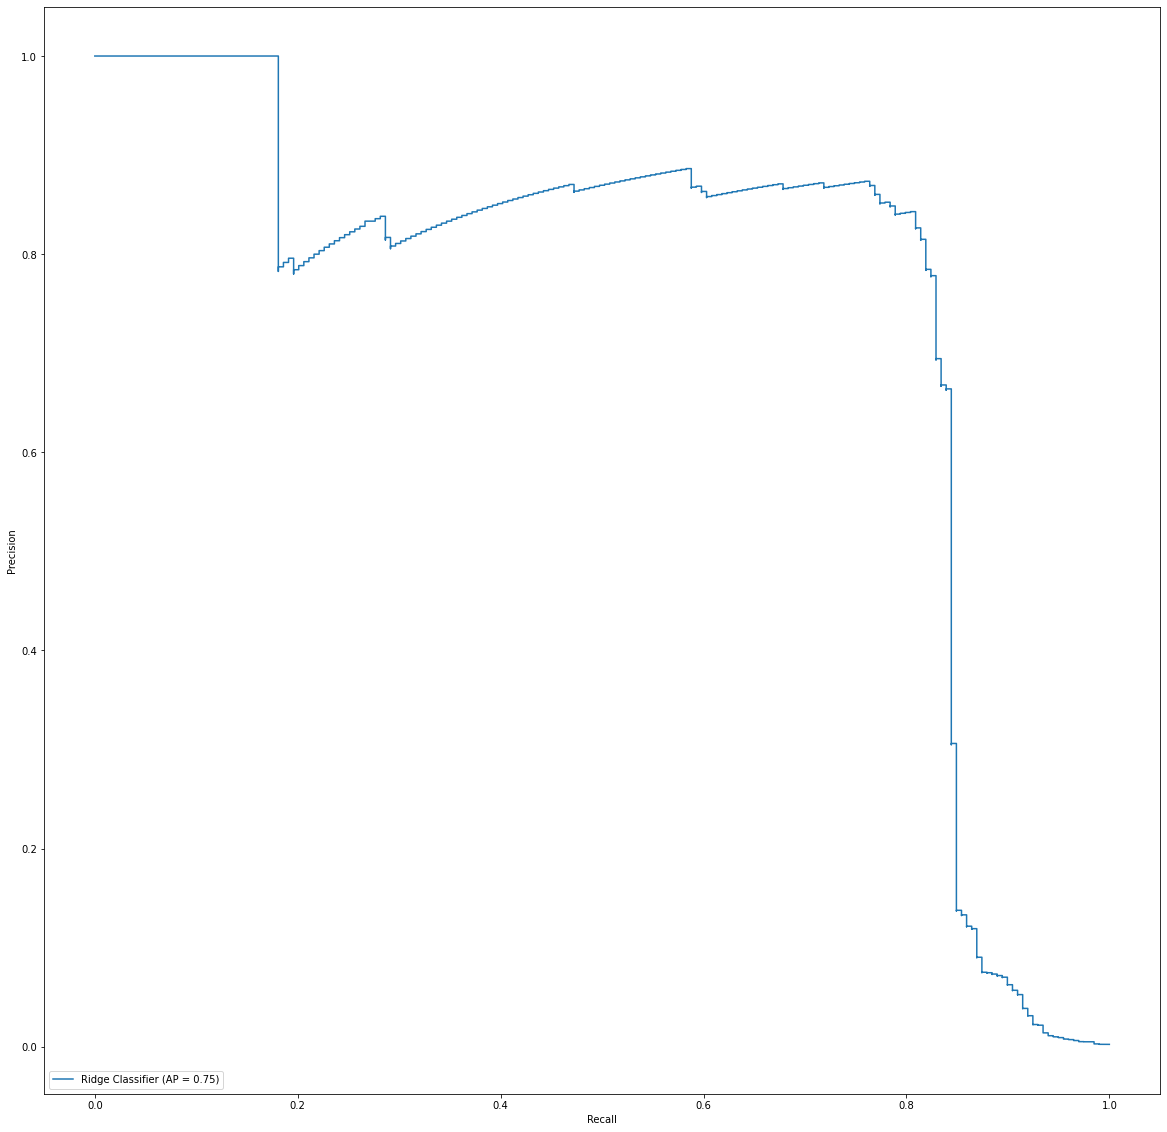

In [ ]:
#Plotting the precision recall curve with the average precision
plot_precision_recall_curve(rc, X_test, y_test, name = 'Ridge Classifier')

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Training the KNeighbours Classifier model on train data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn, X_train, y_train, cv = cross_val)

#Returning the confusion matrix and classification report
cm_knn = pd.crosstab(y_pred_knn, y_train, rownames = ['pred'], colnames = ['true'], margins = True)
report_knn = classification_report(y_train, y_pred_knn, labels = [0, 1])
print(cm_knn, '\n\n', report_knn)


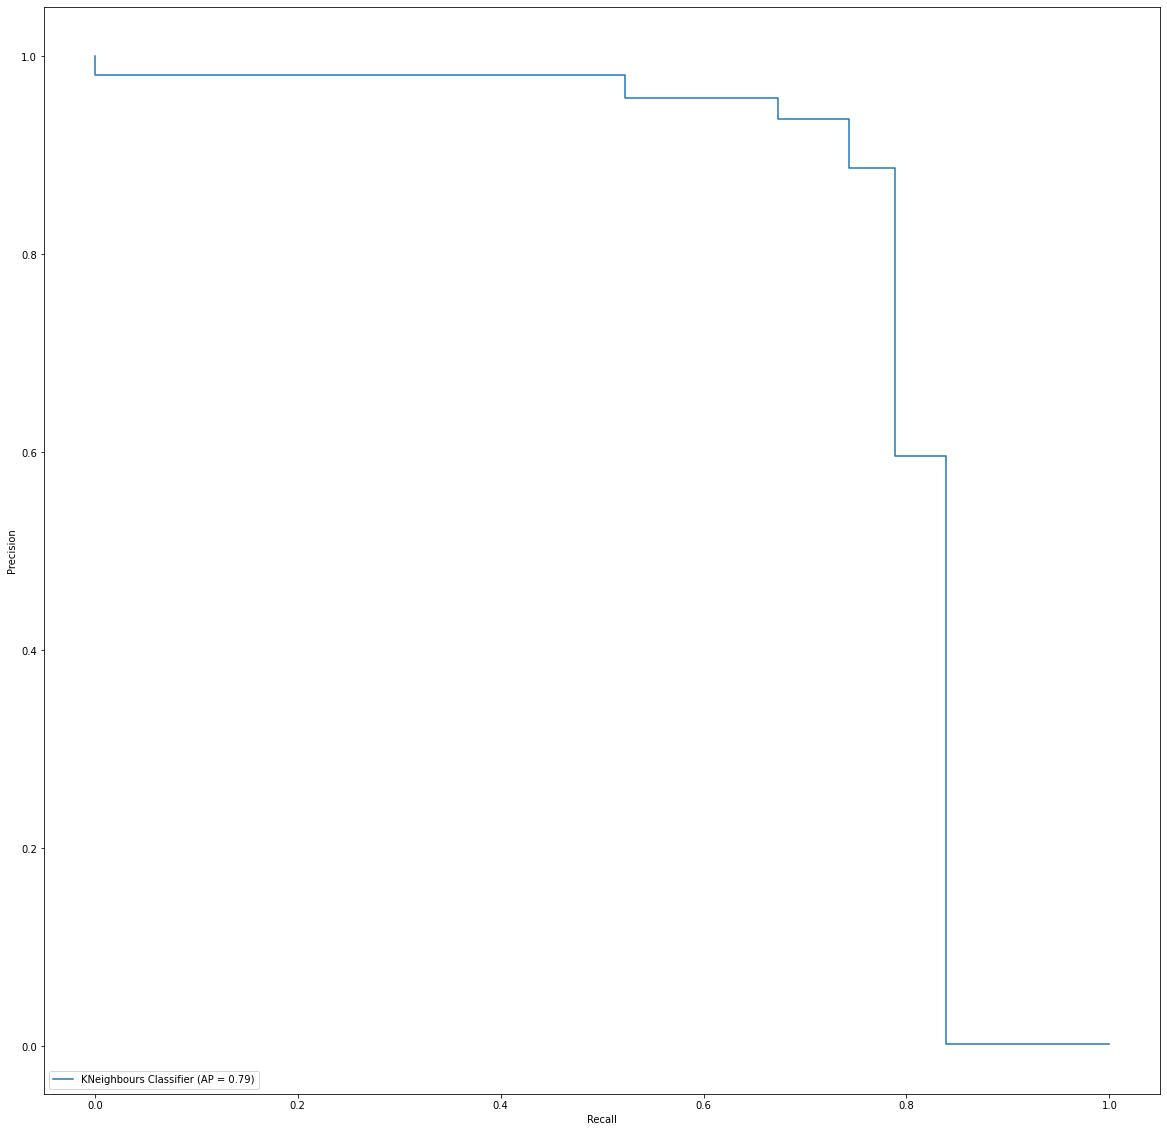

In [ ]:
#Plotting the precision recall curve with the average precision
plot_precision_recall_curve(knn, X_test, y_test, name = 'KNeighbours Classifier')

From the above we can see that the random forest model produces the highest average precision when exposed to new data, making it our most accurate model. Even though some of the other models (e.g. Logistic Regression) have returned higher precision for positive fraudulent transactions when looking at the confusion matrix, I have chosen to use auc and precision recall because confusion matrix accuracy is not meaningful for imbalanced datasets.

### PCA

explained variance ratio:

 [0.12483757 0.08872945 0.07480934 0.06523148 0.06199045 0.05775592
 0.04979852 0.04641696 0.03927497 0.03857867 0.03390148 0.03248758
 0.03223271 0.02990076 0.02726173 0.02498448 0.02347316 0.0228603
 0.02156271 0.01933907 0.01755591 0.01713671 0.01268881 0.01193577
 0.00884199 0.00756684 0.00530131 0.00354534]


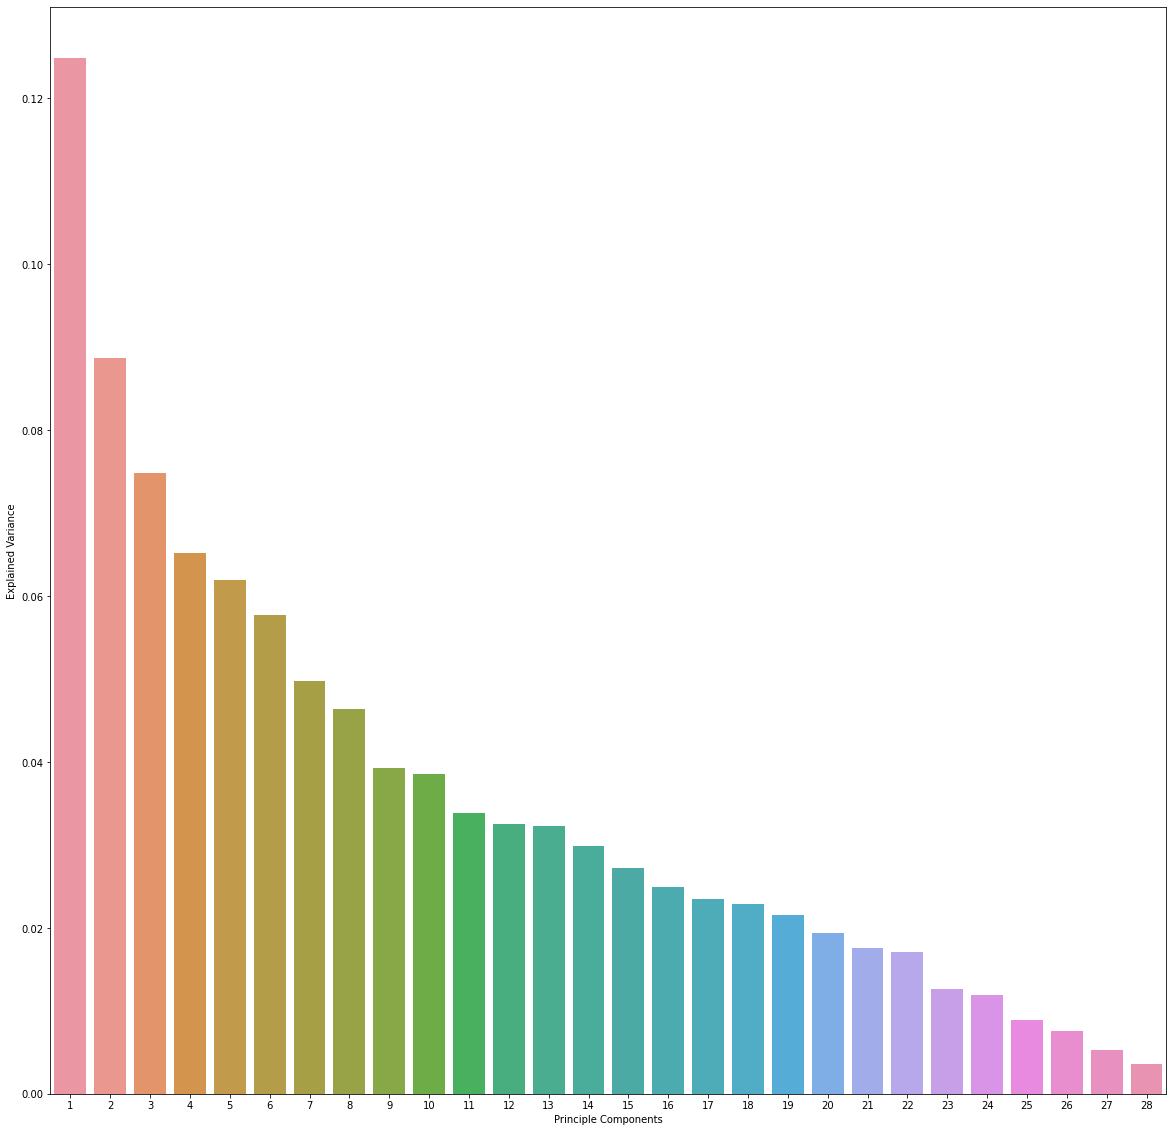

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis

#Splitting the data so that we can run a pca on V1-28
cols = [	"V1", "V2",	"V3",	"V4",	"V5",	"V6",	"V7",	"V8",	"V9",	'V10',	'V11',	'V12',	'V13',	'V14',	"V15",	"V16",	"V17",
        'V18',	"V19",	"V20",	"V21",	"V22",	"V23",	"V24",	"V25",	"V26",	"V27",	"V28"]
data_x_pca = creditcard[creditcard.columns.difference(["Class", "Amount", "Time"])]
data_x_pca = data_x_pca[cols]

#Running PCA on the data
pca = PCA()
data_x_pca = pca.fit(data_x_pca)
pca_components = pca.components_

#Print the explained variance ratios for each principle component 
print("explained variance ratio:\n\n", pca.explained_variance_ratio_)

var_ratio = pd.DataFrame({'Explained Variance':pca.explained_variance_ratio_,
             'Principle Components':['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18',
             '19','20',"21",	"22",	"23",	"24",	"25",	"26",	"27",	"28"]})

#Plot explained variance for each principle component
sns.barplot(x = 'Principle Components', y = 'Explained Variance', data=var_ratio);

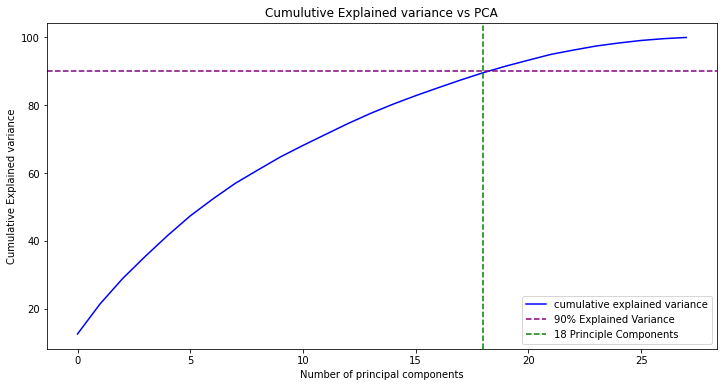

In [ ]:
#Plotting a graph to show the cumulitive explained variance everytime we add a principle component
cum_var = np.cumsum(pca.explained_variance_ratio_)*100
ex = [n for n in range(len(cum_var+1))]
plt.figure(figsize=(12, 6))
plt.plot(ex,cum_var, color = 'b',label='cumulative explained variance')
plt.axhline(y = 90, color='purple', linestyle='--', label = '90% Explained Variance ')
plt.axvline(x = 18, color='green', linestyle='--', label = '18 Principle Components')
plt.title('Cumulutive Explained variance vs PCA')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Number of principal components')


plt.legend(loc='best')

From the above graph we can see that of the 28 principle components that were provided in the initial data set, we need 18 principle components to account for roughly 90% of the variance.

### Balancing the data set

In [ ]:
from imblearn.over_sampling import SMOTE

#We are using SMOTE over_sampling to have a more even data set of fraudulent vs non fraudulent transactions
data_x_over = X
data_y_over = Y

over = SMOTE()
data_x_over, data_y_over = over.fit_resample(data_x_over, data_y_over)
data_y_over = pd.DataFrame(data_y_over)

#Print the number of fraud vs non fraud values
print(data_y_over[0].value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    284315
0    284315
Name: 0, dtype: int64


In [ ]:
#Split the changed/ oversampled dataset into 60% train and 40% test datat
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(data_x_over, data_y_over, train_size =0.6 )

In [ ]:
#Fitting the Random Forest Classification model onto the over sampled data and reshaping it
rfc.fit(x_over_train, y_over_train)
y_pred_over = rfc.predict(x_over_test)
y_pred_over = np.array(y_pred_over)
y_over_test = np.array(y_over_test)
y_over_test = y_over_test.reshape(-1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
#Returning the connfusion matrix and the classification report of the rfc fitted on the oversampled data
cm_rfc_over = pd.crosstab(y_pred_over, y_over_test, rownames = ['pred'], colnames = ['true'], margins = True)
report_rfc_over = classification_report(y_over_test, y_pred_over, labels = [0, 1])
print( cm_rfc_over, '\n\n', report_rfc_over)

true       0       1     All
pred                        
0     113506       0  113506
1         45  113901  113946
All   113551  113901  227452 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113551
           1       1.00      1.00      1.00    113901

    accuracy                           1.00    227452
   macro avg       1.00      1.00      1.00    227452
weighted avg       1.00      1.00      1.00    227452



From this example, we can see that the RFC fitted onto the oversampled data returns over 99% accuracy on the fraudulent transactions and 100% accuracy on the non-fraudulent transactions. The confusion matrix has shown that out of 113946 positive predictions, only 45 were false positives, and there were no false negatives recorded. This is also beneficial because when dealing with fraud, false positives are better than false negatives, as false negatives would mean that people have gotten away with fraud.

This shows that with the aid of over_sampling, we return a much higher accuracy than the model without the oversampling. Furthermore, the classification report and confusion matrix can be used to evaluate this example as the dataset used in this scenario is balanced as opposed to the previous ones.

Lastly, for over_sampling I did not compare all of the different classification models because in a real-world setting majority of credit card transactions will be non-fraudulent. Therefore, the emphasis was placed on which model would most accurately recognise fraudulent transactions in an imbalanced dataset, and then I chose to improve on this using over_sampling.